In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv('UberDataset.csv')

In [25]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [27]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [28]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [29]:
df.nunique()

START_DATE    1155
END_DATE      1154
CATEGORY         2
START          177
STOP           188
MILES          257
PURPOSE         10
dtype: int64

In [30]:
df['PURPOSE'].value_counts()

PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [31]:
df['PURPOSE'].fillna(method='ffill',inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13508\1853775989.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna(method='ffill',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13508\1853775989.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PURPOSE'].fillna(method='ffill',inplace=True)


In [32]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [33]:
#CONVERTING START_DATE AND END_DATE TO DATETIME FORMAT
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [34]:
#DROP ROWS WITH MISSING VALUES
df.dropna(subset=['CATEGORY','START','STOP'],inplace=True)

In [35]:
df['CATEGORY']=df['CATEGORY'].str.title().str.strip()
df['START']=df['START'].str.title().str.strip()
df['STOP']=df['STOP'].str.title().str.strip()
df['PURPOSE']=df['PURPOSE'].str.title().str.strip()

In [36]:
df['TRIP_DURATION']=(df['END_DATE']-df['START_DATE']).dt.total_seconds()/60
df['DATE']=df['START_DATE'].dt.date
df['DAY']=df['START_DATE'].dt.day_name()
df['MONTH']=df['START_DATE'].dt.month_name()
df['HOUR']=df['START_DATE'].dt.hour
df['WEEKDAY']=df['START_DATE'].dt.weekday

In [37]:
df.reset_index(drop=True,inplace=True)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_DURATION,DATE,DAY,MONTH,HOUR,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,2016-01-01,Friday,January,21.0,4.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,2016-01-02,Saturday,January,1.0,5.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,2016-01-02,Saturday,January,20.0,5.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,2016-01-05,Tuesday,January,17.0,1.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,2016-01-06,Wednesday,January,14.0,2.0


## EDA ##

## TRIP CATEGORY DISTRIBUTION 

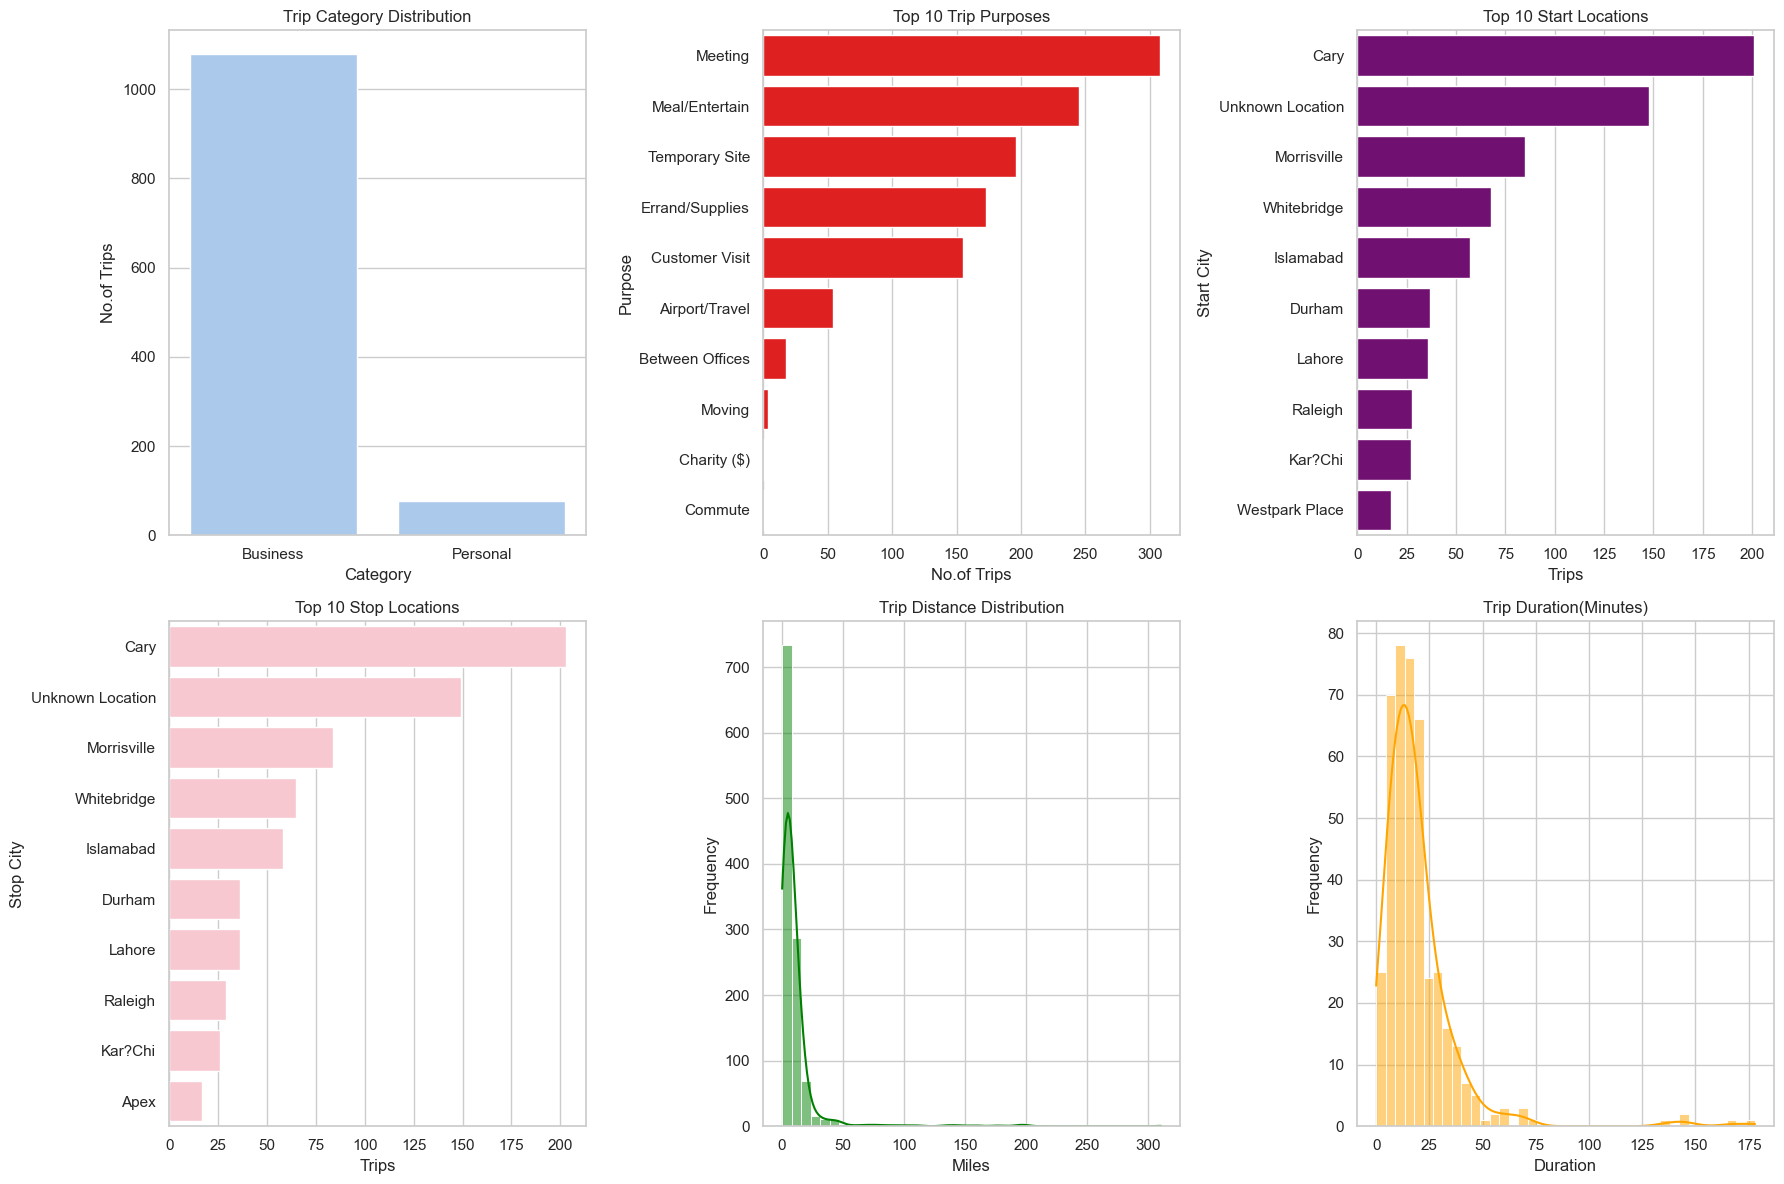

In [58]:
sns.set(style="whitegrid",palette="pastel")
plt.figure(figsize=(18,12))

#TRIP CATEGROY DISTRIBUTION
plt.subplot(2,3,1)
sns.countplot(x='CATEGORY',data=df)
plt.title("Trip Category Distribution")
plt.xlabel("Category")
plt.ylabel("No.of Trips")

#MOST COMMON PURPOSES
plt.subplot(2,3,2)
top_purposes=df['PURPOSE'].value_counts().head(10)
sns.barplot(x=top_purposes.values,y=top_purposes.index,color='red')
plt.title('Top 10 Trip Purposes')
plt.xlabel('No.of Trips')
plt.ylabel('Purpose')

#TOP START LOCATIONS
plt.subplot(2,3,3)
top_start=df['START'].value_counts().head(10)
sns.barplot(x=top_start.values,y=top_start.index,color='purple')
plt.title('Top 10 Start Locations')
plt.xlabel('Trips')
plt.ylabel('Start City')

#TOP STOP LOCATIONS
plt.subplot(2,3,4)
top_stop=df['STOP'].value_counts().head(10)
sns.barplot(x=top_stop.values,y=top_stop.index,color='pink')
plt.title('Top 10 Stop Locations')
plt.xlabel('Trips')
plt.ylabel('Stop City')


#TRIP DISTANCE DISTRIBUTION
plt.subplot(2,3,5)
sns.histplot(df['MILES'],bins=40,kde=True,color='green')
plt.title('Trip Distance Distribution')
plt.xlabel('Miles')
plt.ylabel('Frequency')

#TRIP DURATION DISTRIBUTION
plt.subplot(2,3,6)
sns.histplot(df['TRIP_DURATION'],bins=40,kde=True,color='orange')
plt.title('Trip Duration(Minutes)')
plt.xlabel('Duration')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

## Time-Based Trend Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13508\2233345943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HOUR',data=df,palette='coolwarm')


Text(0, 0.5, 'No.of Trips')

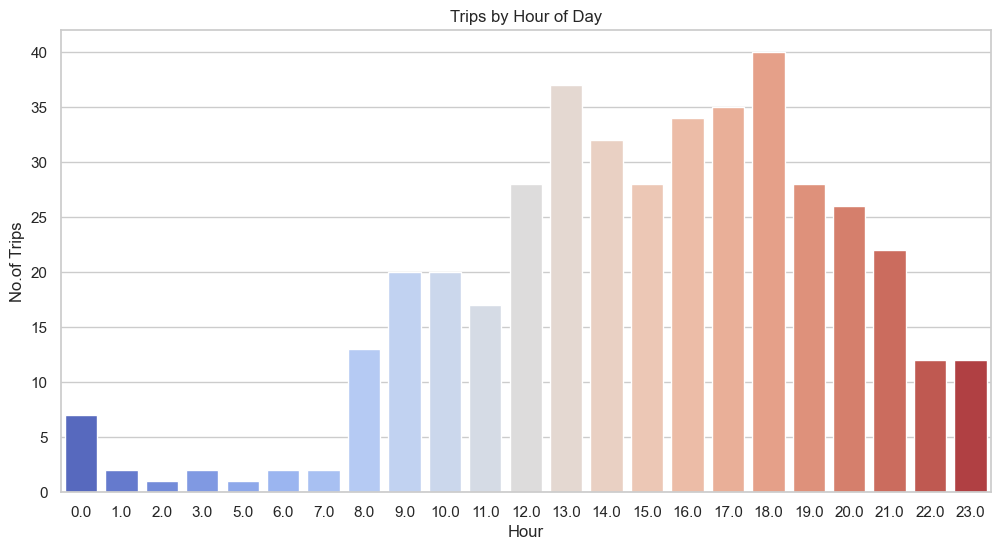

In [70]:
#TRIPS BY HOUR
plt.figure(figsize=(12,6))
sns.countplot(x='HOUR',data=df,palette='coolwarm')
plt.title('Trips by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('No.of Trips')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

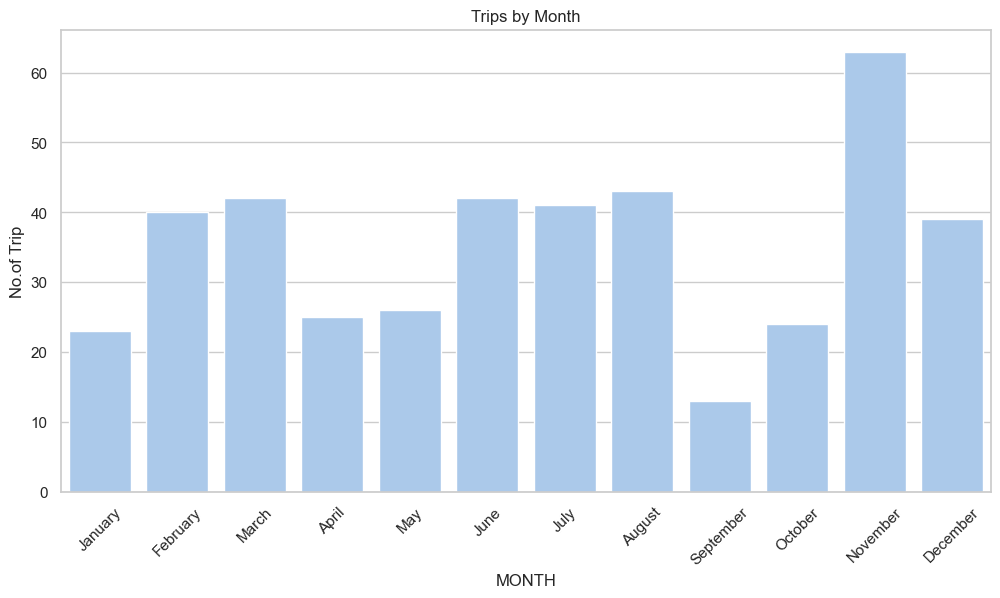

In [71]:
plt.figure(figsize=(12,6))
month_trip=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(x='MONTH',data=df,order=month_trip)
plt.title('Trips by Month')
plt.ylabel('No.of Trip')
plt.xticks(rotation=45)

Text(0, 0.5, 'Trips')

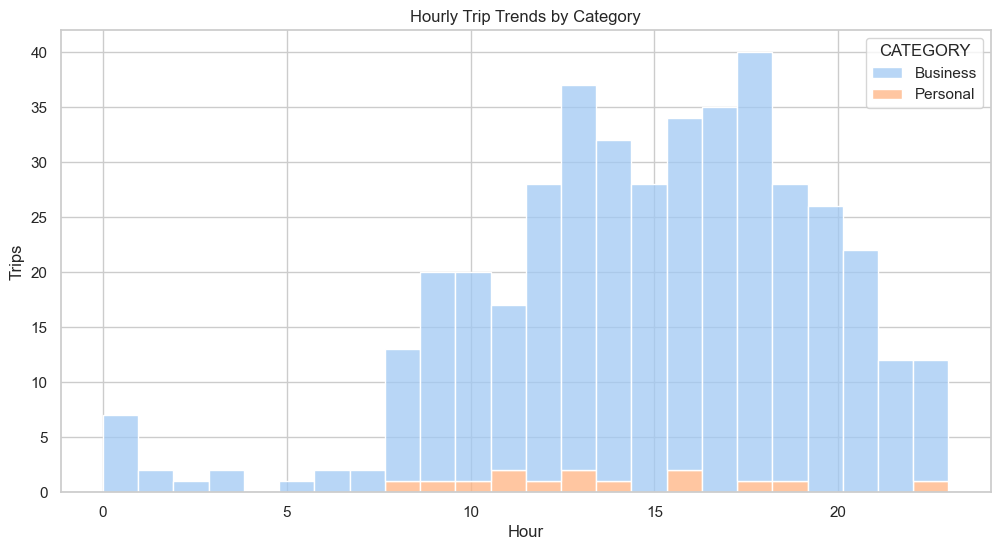

In [74]:
#HOURLY TRENDS BY CATREGORY
plt.figure(figsize=(12,6))
sns.histplot(x='HOUR',hue='CATEGORY',data=df,multiple='stack',bins=24)
plt.title("Hourly Trip Trends by Category")
plt.xlabel("Hour")
plt.ylabel("Trips")

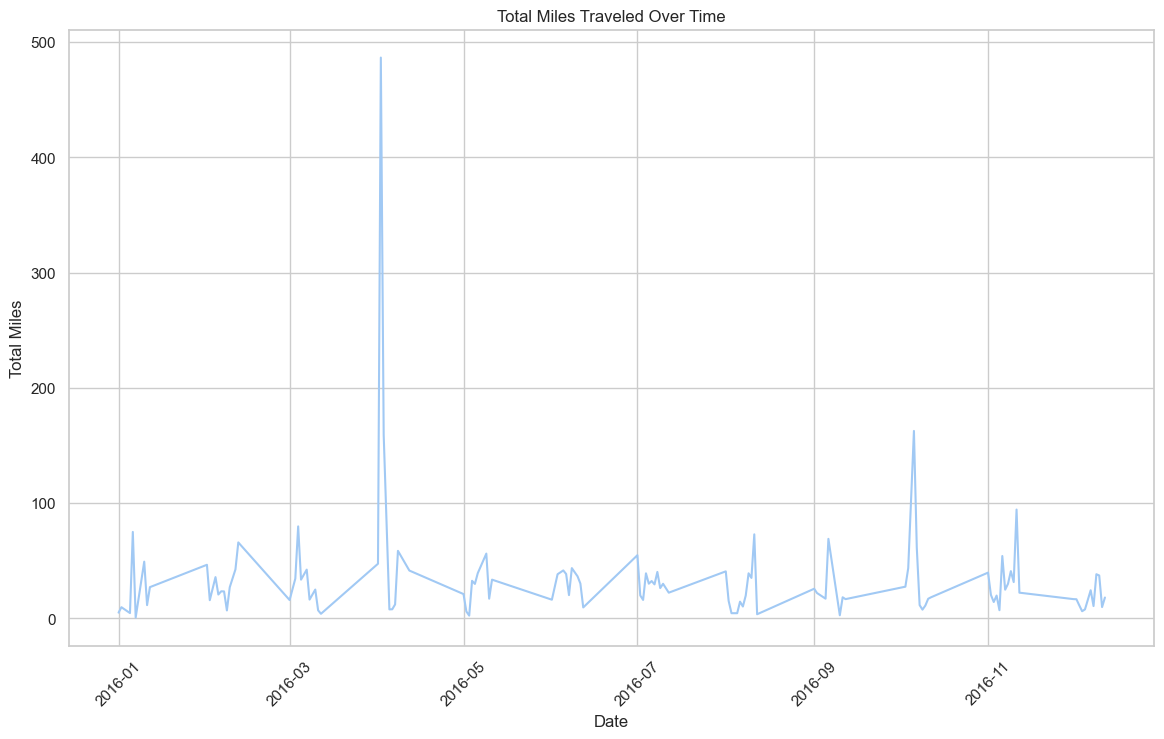

In [75]:
#TOTAL MILES OVER TIME
plt.figure(figsize=(14,8))
daily_miles=df.groupby('DATE')['MILES'].sum().reset_index()
sns.lineplot(x='DATE',y='MILES',data=daily_miles)
plt.title("Total Miles Traveled Over Time")
plt.xlabel("Date")
plt.ylabel("Total Miles")
plt.xticks(rotation=45)
plt.show()

In [92]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Step 1: Prepare data
df_reg = df.copy()

# Remove rows with missing trip duration or miles
df_reg = df_reg[['MILES', 'HOUR', 'DAY', 'MONTH', 'TRIP_DURATION']].dropna()

# Step 2: Convert DAY and MONTH to numeric
day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
           'Friday': 4, 'Saturday': 5, 'Sunday': 6}
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4,
             'May': 5, 'June': 6, 'July': 7, 'August': 8,
             'September': 9, 'October': 10, 'November': 11, 'December': 12}

df_reg['DAY'] = df_reg['DAY'].map(day_map)
df_reg['MONTH'] = df_reg['MONTH'].map(month_map)

# Final check to ensure all are numeric
df_reg = df_reg.dropna()  # Remove rows with unmapped (null) values

# Step 3: Define X and y
X = df_reg[['MILES', 'HOUR', 'DAY', 'MONTH']]
y = df_reg['TRIP_DURATION']

# Step 4: Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 5: Train Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"📊 Evaluation Metrics:")
print(f"MAE : {mae:.2f} minutes")
print(f"RMSE: {rmse:.2f} minutes")
print(f"R²  : {r2:.2f}")


📊 Evaluation Metrics:
MAE : 6.18 minutes
RMSE: 8.31 minutes
R²  : 0.58


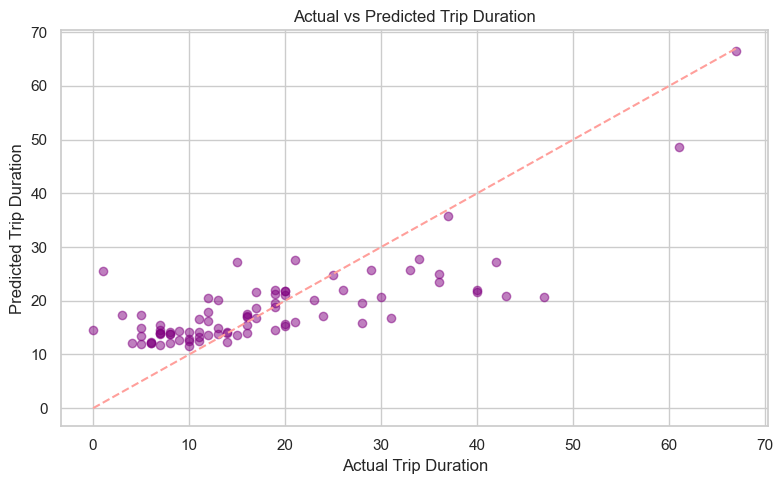

In [93]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Trip Duration")
plt.ylabel("Predicted Trip Duration")
plt.title("Actual vs Predicted Trip Duration")
plt.tight_layout()
plt.show()


## Trip Type Classification

📋 Classification Report:
              precision    recall  f1-score   support

    Personal       0.00      0.00      0.00         3
    Business       0.96      1.00      0.98        81

    accuracy                           0.96        84
   macro avg       0.48      0.50      0.49        84
weighted avg       0.93      0.96      0.95        84


🧾 Confusion Matrix:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


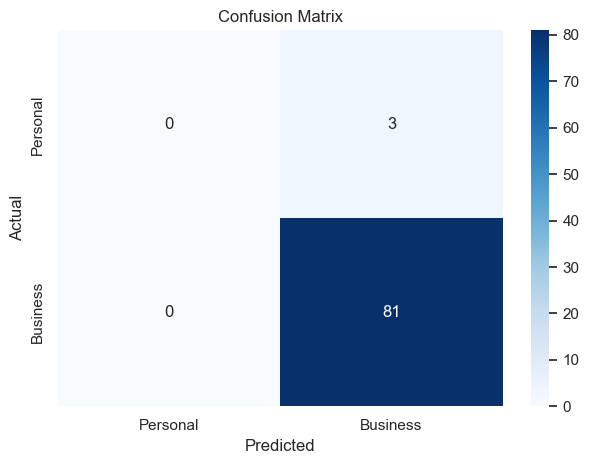

In [102]:
# Step 0: Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Copy original cleaned DataFrame
df_clf = df.copy()

# Step 2: Drop rows with missing CATEGORY
df_clf = df_clf.dropna(subset=['CATEGORY'])

# Step 3: Encode CATEGORY as 0 (Personal) and 1 (Business)
df_clf['CATEGORY'] = df_clf['CATEGORY'].map({'Personal': 0, 'Business': 1})

# Step 4: Encode DAY and MONTH
day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
           'Friday': 4, 'Saturday': 5, 'Sunday': 6}
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4,
             'May': 5, 'June': 6, 'July': 7, 'August': 8,
             'September': 9, 'October': 10, 'November': 11, 'December': 12}

df_clf['DAY'] = df_clf['DAY'].map(day_map)
df_clf['MONTH'] = df_clf['MONTH'].map(month_map)

# Step 5: Convert START_DATE to datetime
df_clf['START_DATE'] = pd.to_datetime(df_clf['START_DATE'])

# Step 6: Extract datetime features
df_clf['START_YEAR'] = df_clf['START_DATE'].dt.year
df_clf['START_MONTH'] = df_clf['START_DATE'].dt.month
df_clf['START_DAY'] = df_clf['START_DATE'].dt.day
df_clf['START_HOUR'] = df_clf['START_DATE'].dt.hour
df_clf['START_WEEKDAY'] = df_clf['START_DATE'].dt.weekday

# Step 7: Drop the datetime column
df_clf.drop(columns=['START_DATE'], inplace=True)

# Step 8: One-hot encode START and STOP
df_clf = pd.get_dummies(df_clf, columns=['START', 'STOP'], drop_first=True)

# Step 9: Drop any leftover missing values
df_clf = df_clf.dropna()

# Step 10: Define features and target
features = ['MILES', 'HOUR', 'DAY', 'MONTH', 'START_YEAR', 'START_MONTH',
            'START_DAY', 'START_HOUR', 'START_WEEKDAY'] + \
           [col for col in df_clf.columns if col.startswith('START_') or col.startswith('STOP_')]

X = df_clf[features]
y = df_clf['CATEGORY']

# Step 11: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 12: Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 13: Predict
y_pred = clf.predict(X_test)

# Step 14: Evaluation
print("📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Personal", "Business"]))

print("\n🧾 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Personal", "Business"], yticklabels=["Personal", "Business"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [103]:
# Save to CSV
df_clf.to_csv("uber_cleaned_for_powerbi.csv", index=False)
